In [1]:
# import Library
import pandas as pd
import nltk

In [2]:
# Reading Dataset
data = pd.read_csv('dataset/amazon.tsv',sep='\t')

In [3]:
# data = data[['rating','date','verified_reviews']]

In [4]:
data.head(30)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [5]:
# Showing file information

# Column Name      ->       Discription
# ------------------------------------------------------------------------
# Rating           ->       satisfaction value of range [1,5]
# date             ->       date of item purchased
# variation        ->       When we shop online, the same product is available in various sizes, colors,materials
#                           and price points. These purchasing options are product variants.
# verified_reviews ->       Feedback by customers 
# feedback         ->       value of verified_reviews positive(1) or negative(0)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
# ========== Performing Cleaning operations on Data ==============

# importing Libraries

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
lemmatizer = WordNetLemmatizer()
punct = string.punctuation
stopwords = set(stopwords.words('english'))


def text_clean(text):
    text = text.lower()  #Convert text in lower case
    punc_removed = [char for char in text if char not in punct]  #Removing Punctuations
    punc_removed_join = ''.join(punc_removed)
    
    #Lemmatizing and removing Stop words
    punc_removed_clean = [lemmatizer.lemmatize(word) for word in punc_removed_join.split() if word not in stopwords]
    
    #Removing word those length is 1 or 2
    punc_removed_clean = [word for word in punc_removed_clean if len(word) > 2] 
    punc_removed_clean_join = ' '.join(punc_removed_clean)
    
    return punc_removed_clean_join

In [7]:
data['clean_reviews'] = data['verified_reviews'].apply(text_clean)  #Calling data clean function
data.sample(20)


,rating,date,variation,verified_reviews,feedback,clean_reviews
2439,1,30-Jul-18,Configuration: Fire TV Stick,"Seems to work ok, but no youtube tv? Really? ...",0,seems work youtube really cant believe would b...
2544,5,30-Jul-18,Black Dot,Love it!! Don’t know what took me so long to g...,1,love don’t know took long get one don’t know d...
117,5,30-Jul-18,Charcoal Fabric,It's Alexa.... what else can you say,1,alexa else say
928,2,29-Jul-18,Sandstone Fabric,I am not super impressed with Alexa. When my P...,0,super impressed alexa prime lapsed wouldnt pla...
392,5,23-Jul-18,Black,Awesome. I love Alexa.,1,awesome love alexa
955,5,29-Jul-18,Heather Gray Fabric,Have Alexa throughout the house----the future ...,1,alexa throughout housethe future arrived
1555,5,30-Jul-18,Black Show,Just like any other echo. Doesn’t disappoint,1,like echo doesn’t disappoint
2454,5,31-Jul-18,Black Dot,Family loved it!,1,family loved
3032,5,30-Jul-18,Black Dot,Great addition to my Alexa base. Using it in m...,1,great addition alexa base using guest bedroom ...
1219,5,27-Jul-18,White Spot,This product has made my life much simpler wit...,1,product made life much simpler little one use ...


In [8]:
data.describe(include="all")

,rating,date,variation,verified_reviews,feedback,clean_reviews
count,3150.000000,3150,3150,3150,3150.000000,3150
unique,NaN,77,16,2301,NaN,2180
top,NaN,30-Jul-18,Black Dot,,NaN,
freq,NaN,1603,516,79,NaN,86
mean,4.463175,NaN,NaN,NaN,0.918413,NaN
std,1.068506,NaN,NaN,NaN,0.273778,NaN
min,1.000000,NaN,NaN,NaN,0.000000,NaN
25%,4.000000,NaN,NaN,NaN,1.000000,NaN
50%,5.000000,NaN,NaN,NaN,1.000000,NaN
75%,5.000000,NaN,NaN,NaN,1.000000,NaN


In [9]:
data.head()

,rating,date,variation,verified_reviews,feedback,clean_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing old learns dinosaur control ligh...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music


In [10]:
# # ----------- Representing data ---------------------

# import seaborn as sns
# sns.pairplot(data,hue='feedback')

In [11]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf_v=TfidfVectorizer(max_features=1000,ngram_range=(1,2))
# X=tfidf_v.fit_transform(data['clean_reviews']).toarray()

In [12]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(max_features=2000)
# X = vectorizer.fit_transform(data['clean_reviews'])#.toarray()
# X.shape

In [13]:
# Representing highest perchase on date
date = data['date'].value_counts()
date.head()

30-Jul-18    1603
29-Jul-18     482
28-Jul-18     250
26-Jul-18      85
31-Jul-18      81
Name: date, dtype: int64

In [14]:
feed = data['feedback'].value_counts()
feed.head()

1    2893
0     257
Name: feedback, dtype: int64

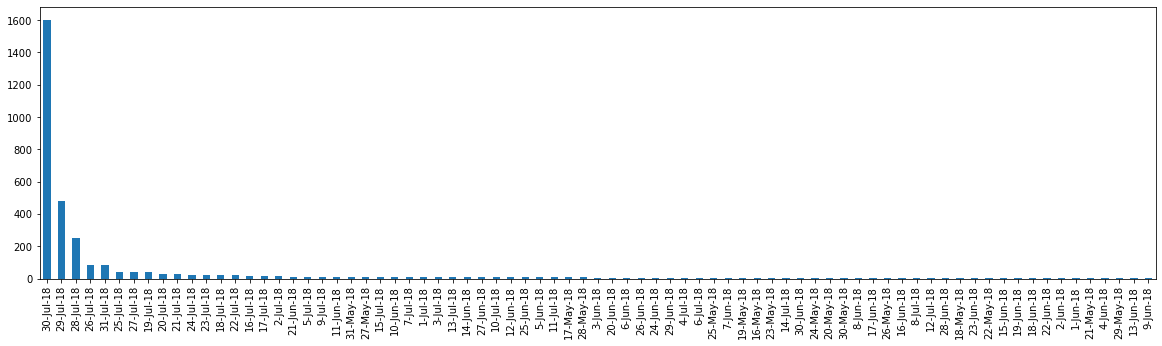

In [15]:
date.plot(kind='bar',figsize=(20,5))

In [16]:
# Representing high rating
rating = data['rating'].value_counts()
rating.head()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

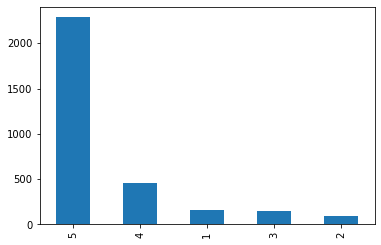

In [17]:
rating.plot(kind='bar')

In [21]:
# Getting bag of words on in reviews
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=2000)
X = vectorizer.fit_transform(data['clean_reviews'],data['rating']).toarray() #getting array of Bag of Words
X.shape

(3150, 2000)

In [22]:
X


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
y=pd.get_dummies(data['feedback']) #get_dummies --> it used for categorical variable into a series of zeros and ones
y=y.iloc[:,1].values #getting value of second column

In [24]:
# y = data['feedback']

In [25]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [26]:
from sklearn.model_selection import train_test_split      #deviding data into training and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# X_train -> Taking dataset for training 
# X_test  -> Taking dataset for testing
# y_train -> output(target data) for training
# y_test  -> output(target data) for testing
# test_size -> The ideal split is said to be 80:20 for training and testing.
#              for our need we adjust it depending on the size of the dataset and parameter complexity.

# random_state -> random state value present the state of suffle data in train and test split

In [27]:
print(X_train)
X_train.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(2520, 2000)

In [28]:
print(X_test)
X_test.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(630, 2000)

In [29]:
print(y_train)
y_train.shape

[1 1 1 ... 1 1 1]


(2520,)

In [30]:
print(y_test)
y_test.shape

[1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 

(630,)

# # --------- Model Selection -----------

In [31]:
# Importing library
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

---------------- Using model Logistic regression ------------------

In [36]:
#Using model Logistic regression
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)    #fitting training data in model
pred_logistic = logistic.predict(X_test)  #getting predict value on test data

score = logistic.score(X_test, y_test) #getting accuracy on predict and real data
cm = confusion_matrix(y_test, pred_logistic)  #generating confussion metrics
cr1 = classification_report(y_test, pred_logistic)  #generating classification report

print("Logistic Regression Accuracy :   %0.2f" % score)
print("Confussion Metrics : ","\n",cm)
print("Classification Report : ","\n",cr1)

Logistic Regression Accuracy :   0.94
Confussion Metrics :  
 [[ 21  33]
 [  5 571]]
Classification Report :  
               precision    recall  f1-score   support

           0       0.81      0.39      0.53        54
           1       0.95      0.99      0.97       576

    accuracy                           0.94       630
   macro avg       0.88      0.69      0.75       630
weighted avg       0.93      0.94      0.93       630



---------------- MultinomialNB Classifier ----------------


In [32]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()  
classifier.fit(X_train, y_train)  #fitting training data in model

pred_m = classifier.predict(X_test)  #getting predict value on test data
score = metrics.accuracy_score(y_test, pred_m)  #getting accuracy on predict and real data
cm = metrics.confusion_matrix(y_test, pred_m)   #generating confussion metrics
cr2 = classification_report(y_test, pred_m)  #generating classification report

print("MultinomialNB Classifier Accuracy :   %0.2f" % score)
print("Confussion Metrics : ","\n",cm)
print("Classification Report : ","\n",cr2)

MultinomialNB Classifier Accuracy :   0.95
Confussion Metrics :  
 [[ 28  26]
 [  6 570]]
Classification Report :  
               precision    recall  f1-score   support

           0       0.82      0.52      0.64        54
           1       0.96      0.99      0.97       576

    accuracy                           0.95       630
   macro avg       0.89      0.75      0.80       630
weighted avg       0.94      0.95      0.94       630



------------- KNeighbors Classifier ---------------

In [33]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)  #fitting training data in model

pred_knn = knn.predict(X_test)  #getting predict value on test data
score = metrics.accuracy_score(y_test, pred_knn) #getting accuracy on predict and real data
cm = metrics.confusion_matrix(y_test, pred_knn)
cr3 = classification_report(y_test, pred_knn)

print("KNN Classifier Accuracy :   %0.2f" % score)
print("Confussion Metrics : ","\n",cm)
print("Classification Report : ","\n",cr3)

KNN Classifier Accuracy :   0.91
Confussion Metrics :  
 [[  0  54]
 [  5 571]]
Classification Report :  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.91      0.99      0.95       576

    accuracy                           0.91       630
   macro avg       0.46      0.50      0.48       630
weighted avg       0.84      0.91      0.87       630

